In [114]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
from tensorflow.examples.tutorials.mnist import input_data

In [116]:
# Load MNIST data
mnist = input_data.read_data_sets('./MNIST_data/', one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [117]:
x_train = mnist.train

In [118]:
x_train.images.shape

(55000, 784)

In [119]:
x_test = mnist.test
x_test.images.shape

(10000, 784)

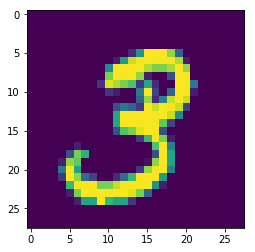

In [120]:
plt.imshow(x_train.images[1].reshape(28,28))

In [121]:
tf.reset_default_graph() 

In [122]:
input_neurons = 784
hidden_neuron_1 = 400
hidden_neuron_2 = 196
hidden_neuron_3 = 400
output_neurons = 784

In [123]:
W_1 = tf.Variable(tf.random_normal(shape=[input_neurons, hidden_neuron_1],stddev=0.05,dtype=tf.float32))
W_2 = tf.Variable(tf.random_normal(shape=[hidden_neuron_1, hidden_neuron_2],stddev=0.01,dtype=tf.float32))
W_3 = tf.Variable(tf.random_normal(shape=[hidden_neuron_2, hidden_neuron_3],stddev=0.02,dtype=tf.float32))
W_4 = tf.Variable(tf.random_normal(shape=[hidden_neuron_3, output_neurons],stddev=0.005,dtype=tf.float32))

In [124]:
b_1 = tf.Variable(tf.zeros(shape=[hidden_neuron_1],dtype=tf.float32))
b_2 = tf.Variable(tf.zeros(shape=[hidden_neuron_2],dtype=tf.float32))
b_3 = tf.Variable(tf.zeros(shape=[hidden_neuron_3],dtype=tf.float32))
b_4 = tf.Variable(tf.zeros(shape=[output_neurons],dtype=tf.float32))

In [125]:
X = tf.placeholder(dtype=tf.float32,shape=[None,784])

In [126]:
hidden_response_1 = tf.nn.relu(tf.matmul(X,W_1)+b_1)

In [127]:
hidden_response_2 = tf.nn.relu(tf.matmul(hidden_response_1,W_2)+b_2)

In [128]:
hidden_response_3 = tf.nn.relu(tf.matmul(hidden_response_2,W_3)+b_3)

In [129]:
output_response = tf.nn.relu(tf.matmul(hidden_response_3,W_4)+b_4)

In [130]:
loss = tf.reduce_mean(tf.square(output_response-X))

In [131]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

In [132]:
train = optimizer.minimize(loss)

In [133]:
init =tf.global_variables_initializer()

In [134]:
saver = tf.train.Saver() 

In [135]:
num_epoch = 20
batch_size = 350
num_batches = mnist.train.num_examples // batch_size
with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(num_epoch):
        
        for j in range(num_batches):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={X:x_batch})
  
        training_loss = loss.eval(feed_dict={X: x_batch})   
        
        print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
        
    saver.save(sess, "./stacked_autoencoder.ckpt")

Epoch 0 Complete. Training Loss: 0.030478354543447495
Epoch 1 Complete. Training Loss: 0.01996387355029583
Epoch 2 Complete. Training Loss: 0.017261125147342682
Epoch 3 Complete. Training Loss: 0.015436503104865551
Epoch 4 Complete. Training Loss: 0.015406685881316662
Epoch 5 Complete. Training Loss: 0.013984953053295612
Epoch 6 Complete. Training Loss: 0.014233492314815521
Epoch 7 Complete. Training Loss: 0.012951561249792576
Epoch 8 Complete. Training Loss: 0.012637884356081486
Epoch 9 Complete. Training Loss: 0.012821486219763756
Epoch 10 Complete. Training Loss: 0.012404637411236763
Epoch 11 Complete. Training Loss: 0.013016412034630775
Epoch 12 Complete. Training Loss: 0.012667892500758171
Epoch 13 Complete. Training Loss: 0.012680350802838802
Epoch 14 Complete. Training Loss: 0.010615942999720573
Epoch 15 Complete. Training Loss: 0.01062960084527731
Epoch 16 Complete. Training Loss: 0.011064798571169376
Epoch 17 Complete. Training Loss: 0.010956184938549995
Epoch 18 Complete. Tra

In [143]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,"./stacked_autoencoder.ckpt")
    
    results = output_response.eval(feed_dict={X:mnist.test.images[:num_test_images]})
    results_middle_bef = hidden_response_1.eval(feed_dict={X:mnist.test.images[:num_test_images]})
    results_middle = hidden_response_2.eval(feed_dict={X:mnist.test.images[:num_test_images]})
    results_middle_aft = hidden_response_3.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder.ckpt


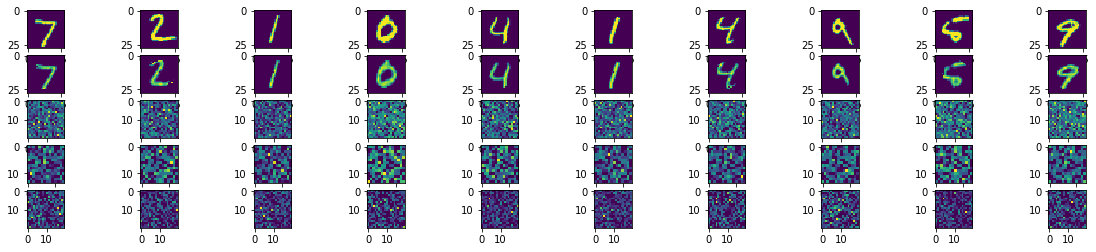

In [144]:
# Compare original images with their reconstructions
f, a = plt.subplots(5, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))
    a[2][i].imshow(np.reshape(results_middle_bef[i], (20, 20)))
    a[3][i].imshow(np.reshape(results_middle[i], (14, 14)))
    a[4][i].imshow(np.reshape(results_middle_aft[i], (20, 20)))